FOr CSV VISUAL

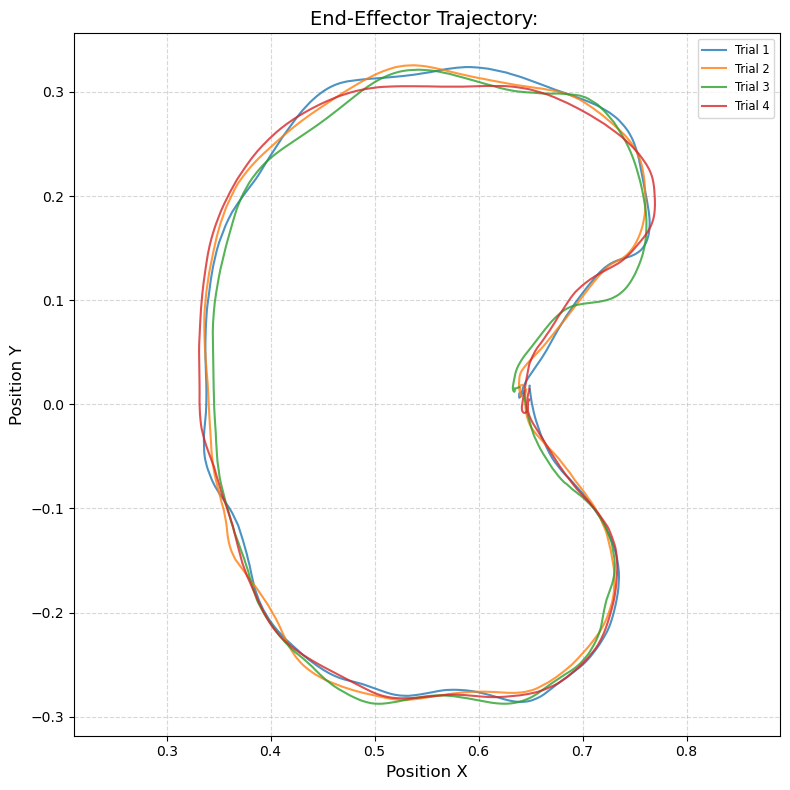

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# 1. Setup paths
path = './' # Change this if your files are in a different folder
file_pattern = os.path.join(path, "franka_follower_*.csv")
files = sorted(glob.glob(file_pattern))

plt.figure(figsize=(8, 8))

# 2. Loop through files and plot
for i, file in enumerate(files):
    # Read the CSV (Pandas automatically handles the header)
    df = pd.read_csv(file)
    
    # Check if the columns exist to avoid errors
    if 'pos_x' in df.columns and 'pos_y' in df.columns:
        plt.plot(df['pos_x'], df['pos_y'], label=f"Trial {i+1}", alpha=0.8)
    else:
        print(f"Columns not found in {file}. Check headers.")

# 3. Formatting for clarity
plt.title('End-Effector Trajectory: ', fontsize=14)
plt.xlabel('Position X', fontsize=12)
plt.ylabel('Position Y', fontsize=12)

# Important: Keep the aspect ratio equal so the "bean" isn't stretched!
plt.axis('equal') 
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend(loc='upper right', fontsize='small')

plt.tight_layout()
plt.show()

FOR NPY VISUALS

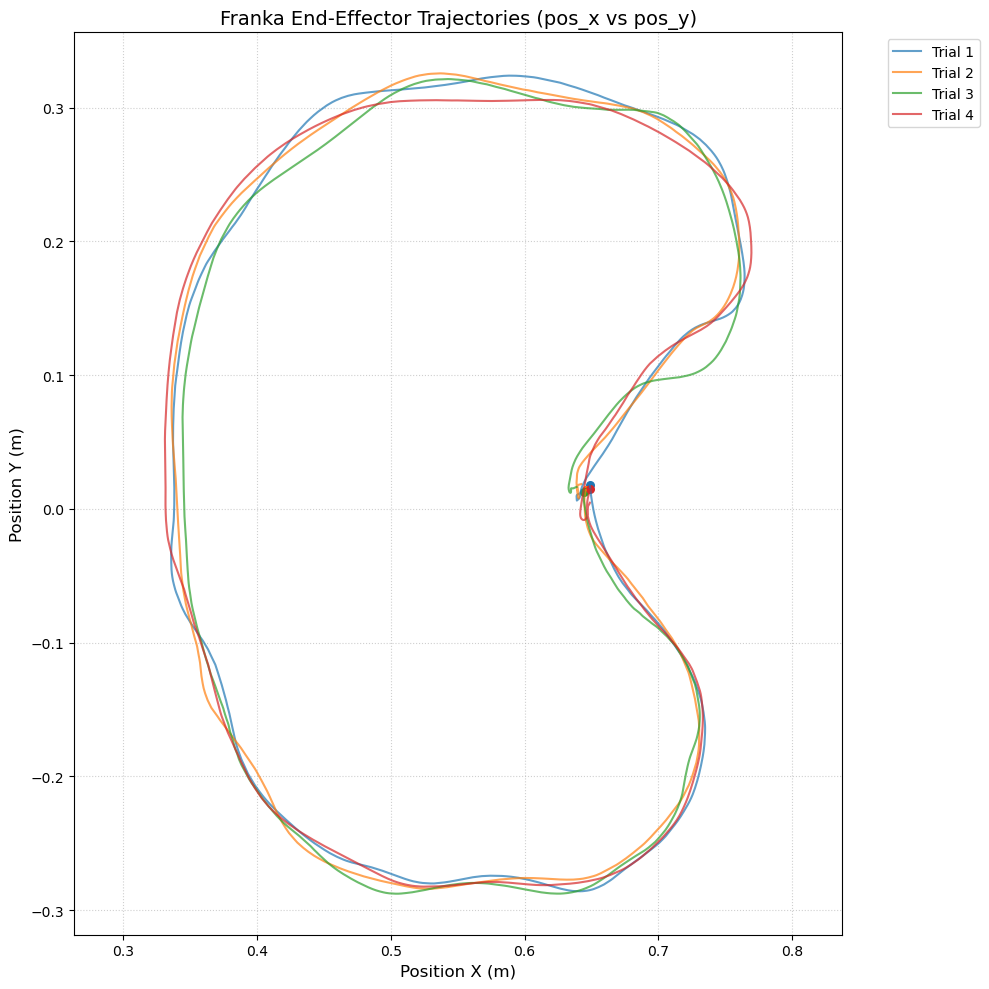

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# 1. Find all .npy files in the current directory
file_pattern = "franka_follower_*.npy"
files = sorted(glob.glob(file_pattern))

plt.figure(figsize=(10, 10))

# 2. Loop through and plot each file
for i, file in enumerate(files):
    # Load the binary numpy data
    data = np.load(file)
    
    # Based on your CSV header: 
    # pos_x is index 29, pos_y is index 30
    try:
        pos_x = data[:, 29]
        pos_y = data[:, 30]
        
        plt.plot(pos_x, pos_y, label=f"Trial {i+1}", alpha=0.7)
        
        # Optional: Add a 'start' marker to see direction
        plt.scatter(pos_x[0], pos_y[0], marker='o', s=30) 
        
    except IndexError:
        print(f"Error: {file} does not have enough columns (expected at least 31).")

# 3. Formatting for the Kidney Bean visualization
plt.title('Franka End-Effector Trajectories (pos_x vs pos_y)', fontsize=14)
plt.xlabel('Position X (m)', fontsize=12)
plt.ylabel('Position Y (m)', fontsize=12)

# This line is CRITICAL to see the true shape of the 'kidney bean'
plt.axis('equal') 

plt.grid(True, linestyle=':', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Save or show the plot
plt.savefig('WIPEVISUAL.png', dpi=300)
plt.show()